# Exploration

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from resnets_utils import *
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow

from PIL import Image, ImageOps

from test_utils import summary, comparator
import public_tests

%matplotlib inline

In [2]:
from utils import center_crop

In [3]:
%config IPCompleter.use_jedi=False

## Import Dataset

In [4]:
X_train_raw, Y_train_raw, X_test_raw, Y_test_raw, classes = load_dataset()

# Normalize image vectors
X_train = X_train_raw / 255.
X_test = X_test_raw / 255.

# Convert training and test labels to one hot matrices
y_train = convert_to_one_hot(Y_train_raw, 6).T
y_test = convert_to_one_hot(Y_test_raw, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
y_test shape: (120, 6)


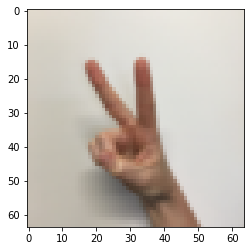

In [5]:
n_image = 4
imshow(X_train_raw[n_image])
plt.show()

## LeNet-5

In [6]:
from tensorflow import keras
from tensorflow.keras import layers


class LeNet5(keras.Model):
    
    def __init__(self, shape, n_classes):
        inputs = keras.Input(shape=shape)
        outputs = self.architecture(inputs, n_classes)
        super().__init__(inputs=inputs, outputs=outputs)
        
    def architecture(self, inputs, n_classes):
        conv2d_opts = dict(kernel_size=5, activation="relu", kernel_initializer = glorot_uniform(seed=0))
        x = layers.Conv2D(filters=6, **conv2d_opts)(inputs)
        x = layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid")(x)
        x = layers.Conv2D(filters=16, **conv2d_opts)(x)
        x = layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid")(x)
        x = layers.Flatten()(x)
        x = layers.Dense(units=120, activation='relu')(x)
        x = layers.Dense(units=84, activation='relu')(x)
        outputs = layers.Dense(n_classes, activation="softmax")(x)
        return outputs

In [14]:
SHAPE = X_train_raw.shape[1:]
N_CLASSES = len(np.unique(Y_train_raw))
EPOCHS = 10
BATCH_SIZE = 32

model = LeNet5(shape = SHAPE, n_classes = N_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)
print("Accuracy =",model.evaluate(X_test, y_test)[1])

Epoch 1/10
34/34 [==============================] - 2s 47ms/step - loss: 1.7520 - accuracy: 0.2426
Epoch 2/10
34/34 [==============================] - 2s 57ms/step - loss: 1.2813 - accuracy: 0.5019
Epoch 3/10
34/34 [==============================] - 2s 59ms/step - loss: 0.9611 - accuracy: 0.6231
Epoch 4/10
34/34 [==============================] - 2s 61ms/step - loss: 0.8668 - accuracy: 0.6750
Epoch 5/10
34/34 [==============================] - 2s 62ms/step - loss: 0.7613 - accuracy: 0.7213
Epoch 6/10
34/34 [==============================] - 2s 45ms/step - loss: 0.6005 - accuracy: 0.7917
Epoch 7/10
34/34 [==============================] - 2s 47ms/step - loss: 0.4748 - accuracy: 0.8407
Epoch 8/10
34/34 [==============================] - 2s 49ms/step - loss: 0.4238 - accuracy: 0.8500
Epoch 9/10
34/34 [==============================] - 2s 48ms/step - loss: 0.3513 - accuracy: 0.8889
Epoch 10/10
4/4 [==============================] - 0s 15ms/step - loss: 0.3736 - accuracy: 0.9000
Accuracy = 

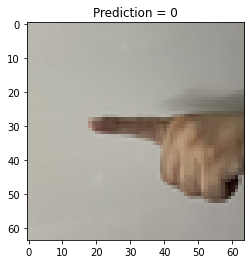

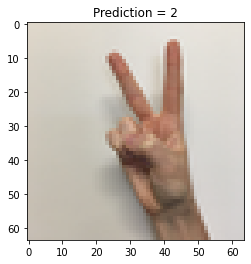

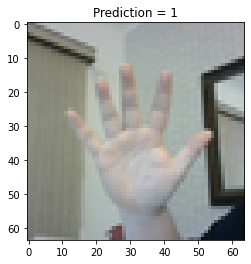

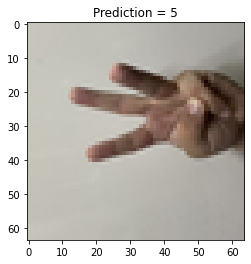

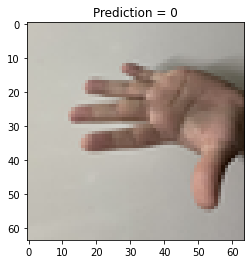

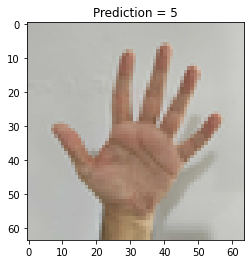

In [16]:
images = [
    "my_image_1.jpeg",
    "my_image.jpg",
    "mao-teste.jpeg",
    "my_image_3.jpeg",
    "my_image_5.jpeg",
    "sant1.jpg",
]

for image in images:
    
    plt.close()
    
    img = center_crop(Image.open(f'images/{image}'), basewidth = 64)

    arr = np.array(img)

    imshow(arr)

    X_out = arr.reshape(tuple([1]+list(arr.shape)))
    
    plt.title("Prediction = {}".format(np.argmax(model.predict(X_out).round(2)[0])))
    
    plt.show()

## AlexNet

In [28]:
from tensorflow import keras
from tensorflow.keras import layers


class AlexNet(keras.Model):
    
    def __init__(self, shape, n_classes):
        inputs = keras.Input(shape=shape)
        outputs = self.architecture(inputs, n_classes)
        super().__init__(inputs=inputs, outputs=outputs)
        
    def architecture(self, inputs, n_classes):
        
        x = layers.Layer()(inputs)
        
        #x = layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same', activation="relu")(x)
        x = layers.Conv2D(filters=96, kernel_size=(9,9), strides=(1,1), padding='same', activation="relu")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")(x)
        
        x = layers.Conv2D(filters=256, kernel_size=(51,5), strides=(1,1), padding='same', activation="relu")(x)
        x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)
        
        x = layers.Flatten()(x)
        x = layers.Dense(units=120, activation='relu')(x)
        x = layers.Dense(units=84, activation='relu')(x)
        outputs = layers.Dense(n_classes, activation="softmax")(x)
        
        return outputs

In [29]:
SHAPE = X_train_raw.shape[1:]
N_CLASSES = len(np.unique(Y_train_raw))
EPOCHS = 10
BATCH_SIZE = 32

model = AlexNet(shape = SHAPE, n_classes = N_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)
print("Accuracy =",model.evaluate(X_test, y_test)[1])

Epoch 1/10
34/34 [==============================] - 29s 848ms/step - loss: 1.5514 - accuracy: 0.4222
Epoch 2/10
34/34 [==============================] - 31s 924ms/step - loss: 0.8349 - accuracy: 0.6787
Epoch 3/10
34/34 [==============================] - 30s 880ms/step - loss: 0.5766 - accuracy: 0.7852
Epoch 4/10
34/34 [==============================] - 30s 873ms/step - loss: 0.2808 - accuracy: 0.9074
Epoch 5/10
34/34 [==============================] - 31s 906ms/step - loss: 0.3035 - accuracy: 0.8963
Epoch 6/10
34/34 [==============================] - 30s 873ms/step - loss: 0.1820 - accuracy: 0.9463
Epoch 7/10
34/34 [==============================] - 30s 882ms/step - loss: 0.1232 - accuracy: 0.9500
Epoch 8/10
34/34 [==============================] - 30s 875ms/step - loss: 0.0846 - accuracy: 0.9694
Epoch 9/10
34/34 [==============================] - 30s 883ms/step - loss: 0.0568 - accuracy: 0.9880
Epoch 10/10
4/4 [==============================] - 1s 191ms/step - loss: 10.9084 - accuracy

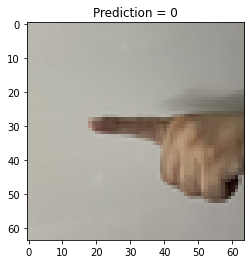

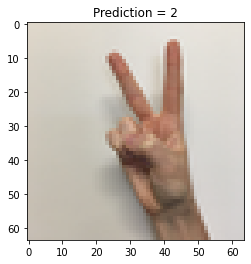

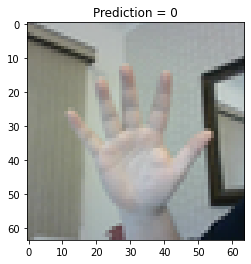

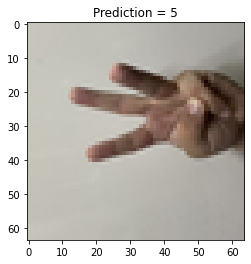

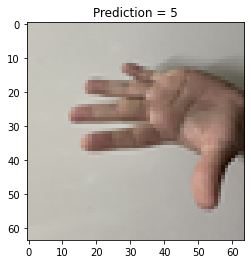

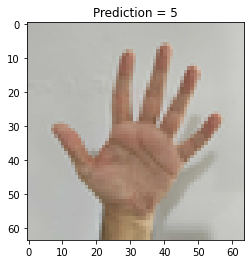

In [30]:
images = [
    "my_image_1.jpeg",
    "my_image.jpg",
    "mao-teste.jpeg",
    "my_image_3.jpeg",
    "my_image_5.jpeg",
    "sant1.jpg",
]

for image in images:
    
    plt.close()
    
    img = center_crop(Image.open(f'images/{image}'), basewidth = 64)

    arr = np.array(img)

    imshow(arr)

    X_out = arr.reshape(tuple([1]+list(arr.shape)))
    
    plt.title("Prediction = {}".format(np.argmax(model.predict(X_out).round(2)[0])))
    
    plt.show()